In [47]:
# Reading text file

library(tm)

tweets = readLines("../input/tweets/Tweets.txt")

In [48]:
# Adjust the size of all plots in R in kaggle notebooks

library(repr) ;
options(repr.plot.width=16, repr.plot.height = 9)

In [49]:
# Building a Corpus

corpus = Corpus(VectorSource(tweets))

# str(corpus)

In [50]:
# Create term document matrix

tdm = TermDocumentMatrix(corpus, 
                        control = list(minWordLength = c(1, Inf)))

t = removeSparseTerms(tdm, sparse = 0.98)

print(tdm)

print(t)

m = as.matrix(t)

#print(m)

<<TermDocumentMatrix (terms: 8425, documents: 2141)>>
Non-/sparse entries: 32089/18005836
Sparsity           : 100%
Maximal term length: 72
Weighting          : term frequency (tf)
<<TermDocumentMatrix (terms: 83, documents: 2141)>>
Non-/sparse entries: 11741/165962
Sparsity           : 93%
Maximal term length: 15
Weighting          : term frequency (tf)


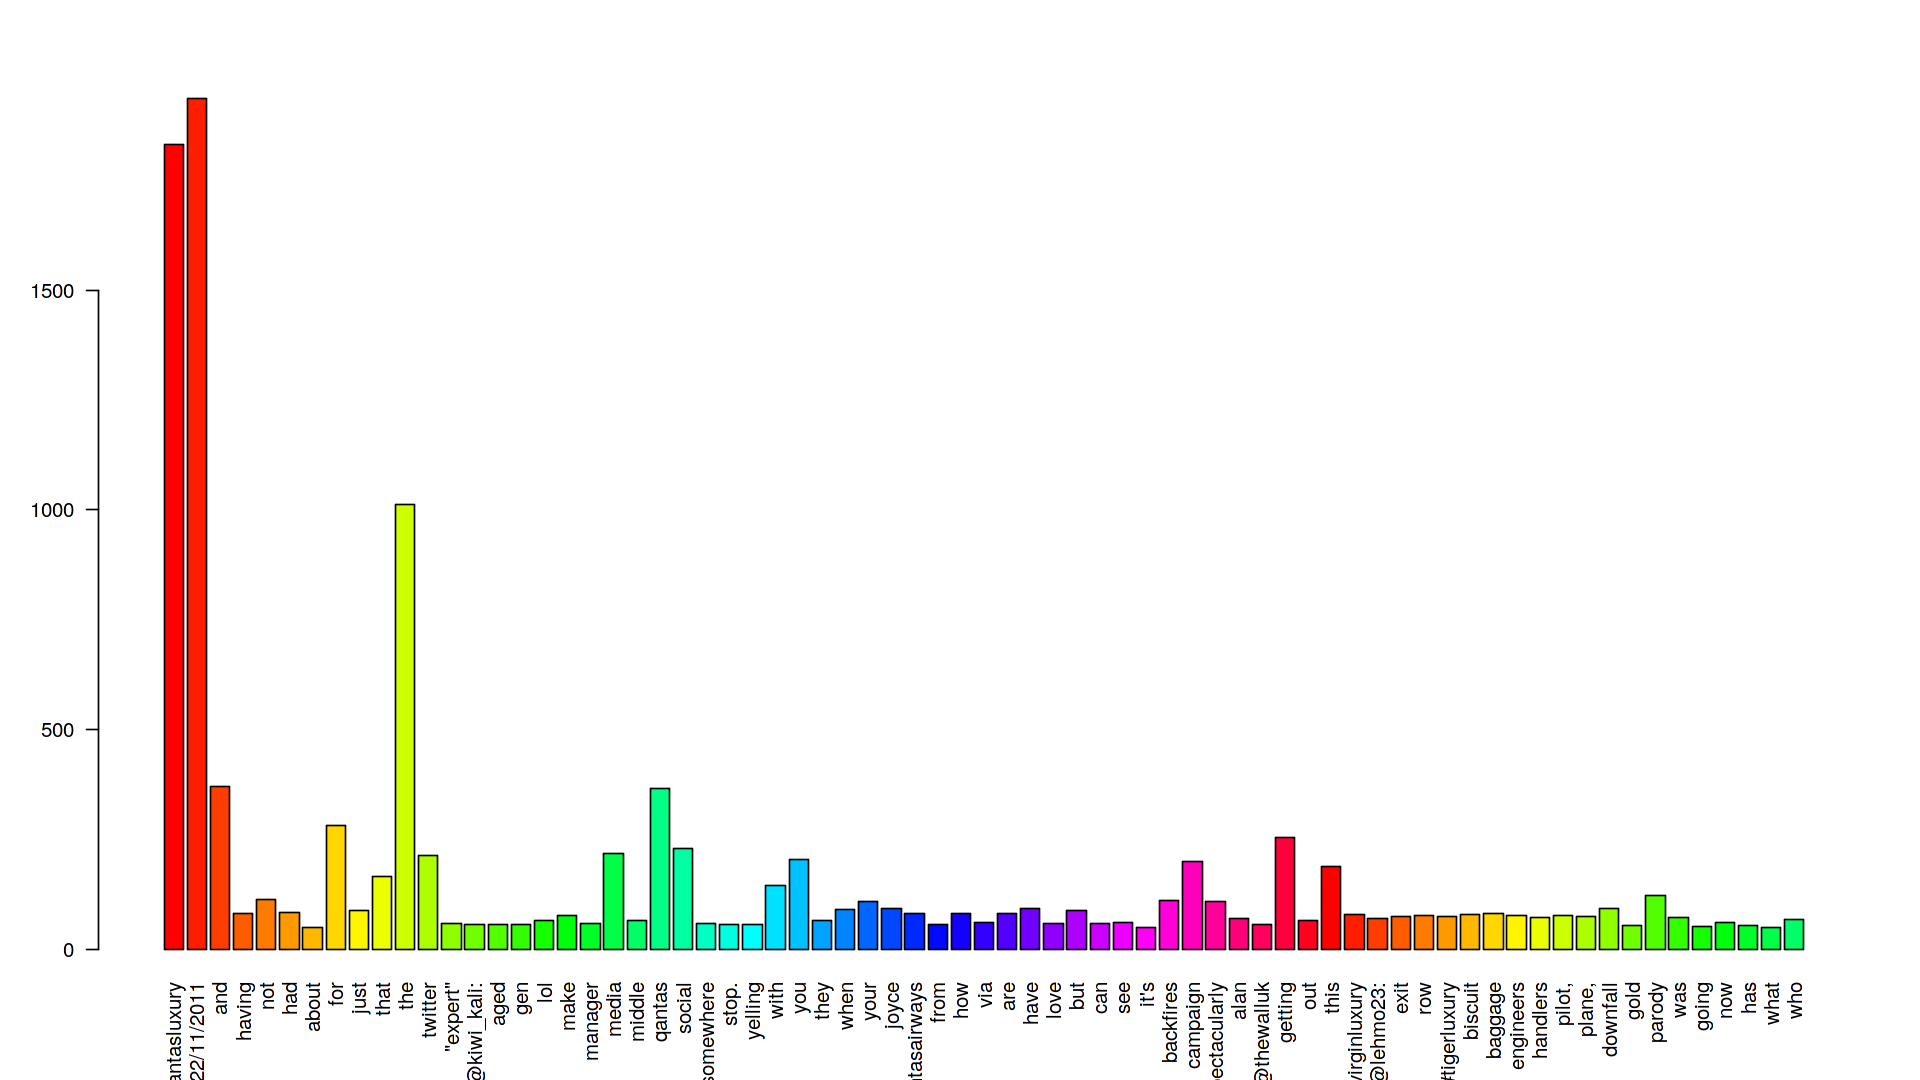

In [51]:
# Plot frequent terms

freq = rowSums(m)

freq = subset(freq, freq >= 50)

barplot(freq, las=2, col = rainbow(50))

In [52]:
# Hierarchical word/tweet clustering using dendrogram

distance = dist(scale(m))

# If distance is high words should not be in the same cluster only low distance should be in same cluster
# print(distance, digits = 2)

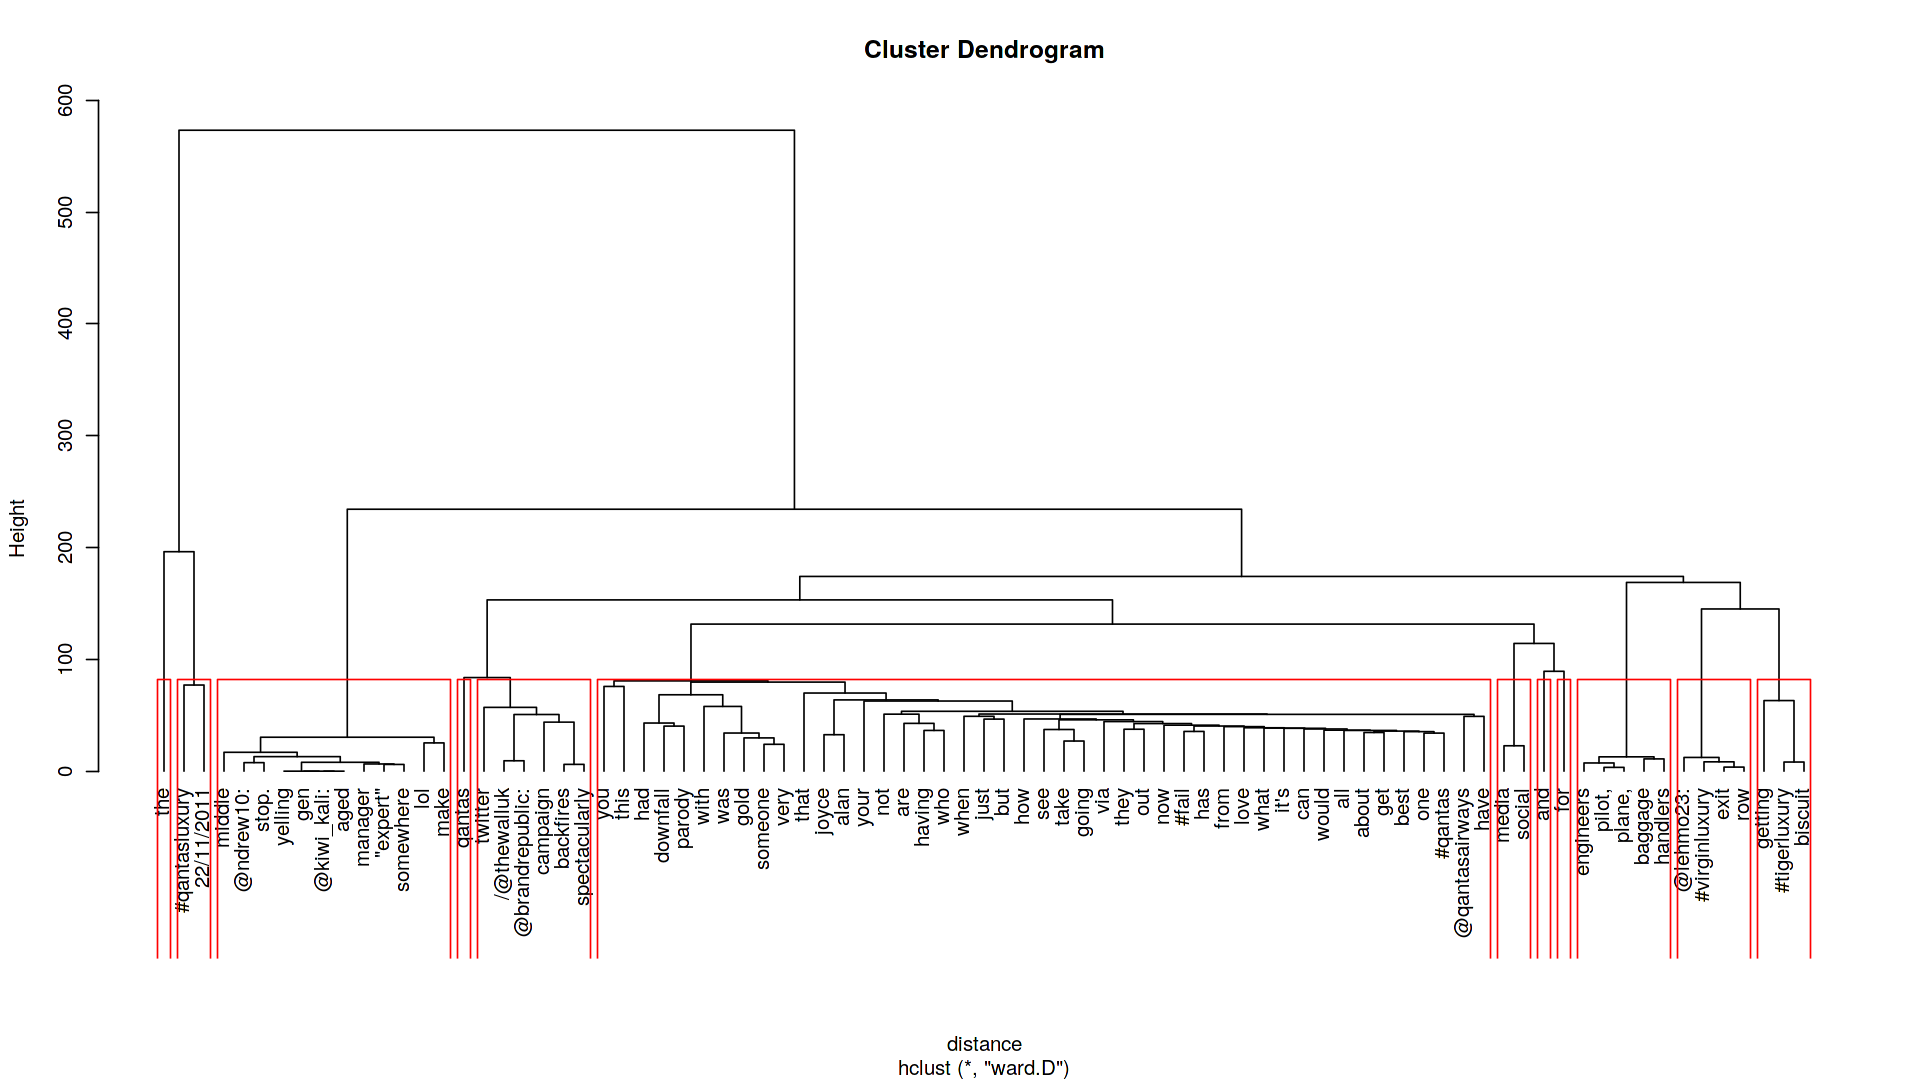

In [56]:
hc = hclust(distance, method = "ward.D")

plot(hc, hang = -1)

rect.hclust(hc, k = 12)    # Dividing diagram into different clusters

In [58]:
# Nonhierarchical k-means clustering of words/tweets

m1 = t(m)

set.seed(222)

k = 15 

kc = kmeans(m1, k)

print(kc)

K-means clustering with 3 clusters of sizes 734, 1332, 75

Cluster means:
  #qantasluxury 22/11/2011       and     having        not        had
1     0.9318801 0.98910082 0.1253406 0.04768392 0.04495913 0.07220708
2     0.8048048 0.90765766 0.1539039 0.03378378 0.05930931 0.02252252
3     1.0000000 0.02666667 0.9866667 0.00000000 0.00000000 0.00000000
       about       for       just       that      the    twitter   "expert"
1 0.03542234 0.1539510 0.05994550 0.11307902 1.378747 0.07220708 0.00000000
2 0.01801802 0.1261261 0.03303303 0.06231231 0.000000 0.12087087 0.04354354
3 0.00000000 0.0000000 0.00000000 0.00000000 0.000000 0.00000000 0.00000000
  @kiwi_kali:  @ndrew10:       aged        gen        lol       make    manager
1  0.00000000 0.00000000 0.00000000 0.00000000 0.01498638 0.01907357 0.00000000
2  0.04279279 0.03528529 0.04279279 0.04279279 0.04054054 0.04654655 0.04354354
3  0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000
       media     middl

**Gives size of each cluster. For each cluster we get averages in the above results. Higher averages mean that it occurs with higher freq. in the given cluster. Clustering vector also gives details were in clusters have these words gone to.
Within cluster sum of squares by cluster needs to be lower and we want (between_SS/ total_SS) to be higher. We can try to change this using different cluster (k) values.**